# EARTH 353and DATA_SCI 422 

## Extension of Exercise 1 (Multilateration)

First run here your complete Python code for exercise 1:

In [182]:
import matplotlib.pyplot as plt; import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [183]:
alpha = 7.7 # km/s
lat2km = 111.19 #km per degree of longitude
lon2km = 56 # km per degree of longitude

In [184]:
dlines = open('loctim.txt','r').readlines()
n = len(dlines)
obsis = np.arange(n)

lat = [] ; lon = []; elv = []; Ptm = []; sta = []

for i in obsis:
    line = dlines[i].split()
    lat.append(float(line[0])*lat2km) # latitude
    lon.append(float(line[1])*lon2km) # longitude
    elv.append(-float(line[2])) # elevation
    Ptm.append(float(line[3])) # arrival time
    sta.append(line[4]) # station names

In [185]:
arrivaltimes_after = []
for i in range(len(Ptm)):
    arrivaltimes_after.append(Ptm[i]-np.mean(Ptm))

lon2kmlist = []; lat2kmlist = []
for i in range(len(lon)):
    lon2kmlist.append(lon[i]/lon2km) 
    lat2kmlist.append(lat[i]/lat2km) 

In [186]:
from math import *
from numpy.linalg import inv

In [187]:
x0 = -8848 ; y0 = 6560.21; t0 = 20; z0 = 120

# 1. compute the vector D with distances to all stations
distance_vec = []
for i in range(len(lon2kmlist)):
    xdiff_sq = (lon[i]-float(x0))**2
    ydiff_sq = (lat[i]-float(y0))**2
    zdiff_sq = (elv[i]-z0)**2 
    D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
    distance_vec.append(D)
# print(distance_vec)

# 2. data vector with residual times corrected for predicted times
restime_cor = []
for i in range(len(distance_vec)):
    restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
    restime_cor.append(restime_val)

In [188]:
from numpy.linalg import inv

left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
for i in range(len(lon2kmlist)):
    listofones.append(1.0)
    left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
    left_col_list.append(left_col)
    right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
    right_col_list.append(right_col)
    
G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
GT = np.transpose(G_matrix) 
GTG = np.matmul(GT, G_matrix)
invGT = inv(GTG)
Ginvtimes_gen = np.matmul(invGT, GT)
m_j = np.matmul(Ginvtimes_gen, restime_cor)

In [189]:
t_new = t0 + m_j[0]
x_new = x0 + m_j[1]
y_new = y0 + m_j[2]

In [190]:
j = 0
xit = [-8697.336867991728]; yit = [6512.27506876285]; otit = [23.477618071752083]
t_ch = []; x_ch = []; y_ch = []
x_it = []; y_it = []; ot_it = []
for j in range(20):
    x0 = x_new; y0 = y_new; t0 = t_new
    distance_vec = []
    for i in range(len(lon2kmlist)):
        xdiff_sq = (lon[i]-float(x0))**2
        ydiff_sq = (lat[i]-float(y0))**2
        zdiff_sq = (elv[i]-z0)**2 
        D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
        distance_vec.append(D)
    restime_cor = []
    for i in range(len(distance_vec)):
        restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
        restime_cor.append(restime_val)
    left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
    for i in range(len(lon2kmlist)):
        listofones.append(1.0)
        left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
        left_col_list.append(left_col)
        right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
        right_col_list.append(right_col)
    G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
    GT = np.transpose(G_matrix) 
    GTG = np.matmul(GT, G_matrix)
    invGT = inv(GTG)
    Ginvtimes_gen = np.matmul(invGT, GT)
    m_j = np.matmul(Ginvtimes_gen, restime_cor)
    print(m_j)
    print()
    print('~~~~~~ Q17 ~~~~~~')
    cov_m = (5**2)*inv(np.matmul(GT,G_matrix)) # assume arrival time data has a standard deviaiton of 5.0s
    print(cov_m)
    print('~~~~~~ Q17 ~~~~~~')
    print()
    t_ch.append(m_j[0]); x_ch.append(m_j[1]); y_ch.append(m_j[2])
    t_new = t0 + m_j[0]; otit.append(t_new); print(t_new)
    x_new = x0 + m_j[1]; xit.append(x_new); print(x_new)
    y_new = y0 + m_j[2]; yit.append(y_new); print(y_new)
    
    if (m_j[0] >= -0.01 and m_j[0] <= 0.01) and (m_j[1] >= -0.001 and m_j[1] <= 0.001) and (m_j[2] >= -0.001 and m_j[2] <= 0.001):  
        break
    print('*****')

[ -3.94622014   5.54445909 -16.6443399 ]

~~~~~~ Q17 ~~~~~~
[[  0.4965743    1.14941404   1.95228065]
 [  1.14941404 107.0235565  -59.47297089]
 [  1.95228065 -59.47297089 109.85682694]]
~~~~~~ Q17 ~~~~~~

19.531397936201504
-8691.792408898616
6495.630728859024
*****
[-0.08261193  0.83099812 -1.15905521]

~~~~~~ Q17 ~~~~~~
[[  0.5231857    0.38206926   2.93450453]
 [  0.38206926 109.02430823 -62.44984808]
 [  2.93450453 -62.44984808 115.30734693]]
~~~~~~ Q17 ~~~~~~

19.44878600152392
-8690.961410778467
6494.471673648228
*****
[-0.00176166  0.07028523 -0.07886734]

~~~~~~ Q17 ~~~~~~
[[  0.52584412   0.30556687   3.02135073]
 [  0.30556687 109.12211374 -62.6917084 ]
 [  3.02135073 -62.6917084  115.76056828]]
~~~~~~ Q17 ~~~~~~

19.447024337156584
-8690.891125546614
6494.39280630336
*****
[-9.37862774e-05  5.32247188e-03 -5.70277978e-03]

~~~~~~ Q17 ~~~~~~
[[  0.52603384   0.29969094   3.02774316]
 [  0.29969094 109.12768007 -62.70924541]
 [  3.02774316 -62.70924541 115.79304145]]
~~~~~~ Q

**Question 17**: Finally, compute and provide the covariance matrix for model vector $\mathbf{m} $, presuming for simplicity that the arrival time data have a standard deviation of 5.0 s. That's rather large for a measured time, but might so partially compensate for some rather coarse approximations in distances, Earth properties, and associated wave propagation.

----------> Answer: 
See above block. It is included in the code.
$$ cov(\mathbf{m}) = \mathbf{G}^{-g} cov(\mathbf{d}) {\mathbf{G}^{-g}}^{T} $$
$$ cov(\mathbf{m}) = \sigma^2 ({{\mathbf{G}}^{T}{\mathbf{G}}})^{-1} $$

In [191]:
print(cov_m)
print(cov_m[1][1:3])
print(cov_m[2][1:3])
print()
covlatlon = np.column_stack((cov_m[1][1:3], cov_m[2][1:3])) 
print(covlatlon)

[[  0.52604765   0.29925442   3.02821357]
 [  0.29925442 109.12806454 -62.71053338]
 [  3.02821357 -62.71053338 115.7954174 ]]
[109.12806454 -62.71053338]
[-62.71053338 115.7954174 ]

[[109.12806454 -62.71053338]
 [-62.71053338 115.7954174 ]]


**Question 18**: Using the model covariance matrix, covlatlon, draw an error ellipse around the epicenter.You may use the following code snippet, where covlatlon represents a 2-dimensional covariance matrix for the longitude and latitude. You can obtain this 2-dimensional covariacne matrix either by ignoring covariance with the origin time (you are then taking the intersection of the 3-dimensional error ellipse with the lat-lon plane), or projecting the 3-dimensional error ellipse onto the lat-lon plane.

In [192]:
longitude = -8690.885803074732
latitude = 6494.387103523577

In [193]:
from matplotlib.patches import Ellipse
# 1 standard deviation
w,v = np.linalg.eig(covlatlon)
major = 2*sqrt(w[0])
minor = 2*sqrt(w[1])
rota = degrees(np.arctan2(v[1,0],v[0,0]))
e = Ellipse((longitude,latitude),major,minor,rota)
e.set_alpha(0.1)
print(e)

Ellipse(xy=(-8690.885803074732, 6494.387103523577), width=14.094348001092895, height=26.4772219500904, angle=-136.5214825883711)


In [194]:
# 2 standard deviation
covlatlon2 = covlatlon
w,v = np.linalg.eig(covlatlon2)
major = 4*sqrt(w[0])
minor = 4*sqrt(w[1])
rota = degrees(np.arctan2(v[1,0],v[0,0]))
f = Ellipse((longitude,latitude),major,minor,rota)
f.set_alpha(0.1)
print(f)

Ellipse(xy=(-8690.885803074732, 6494.387103523577), width=28.18869600218579, height=52.9544439001808, angle=-136.5214825883711)


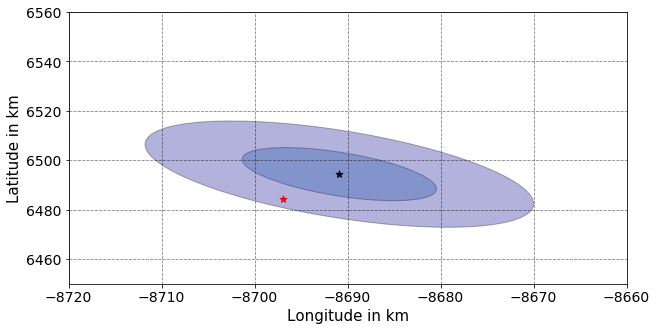

In [195]:
from matplotlib.patches import Ellipse
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt

e_patch = mpl.patches.Ellipse(xy=[ -8690.885803074732, 6494.387103523577], width=14.094348001092895, height=26.4772219500904, angle = -136.52151626435437,edgecolor='black', lw=1, facecolor='tab:blue',alpha=0.3)
f_patch = mpl.patches.Ellipse(xy=[ -8690.885803074732, 6494.387103523577], width=28.18869600218579, height=52.9544439001808, angle = -136.52106017138675,edgecolor='black', lw=1, facecolor='darkblue',alpha=0.3)

fig, ax = plt.subplots(figsize=(10, 5))
plt.grid(linestyle="--", color='black',zorder=0,alpha=0.5)
ax.add_patch(e_patch)
ax.add_patch(f_patch)

ax.set_xlim(-8720, -8660)
ax.set_ylim(6450, 6560)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Longitude in km',fontsize=15)
ax.set_ylabel('Latitude in km',fontsize=15)
ax.scatter(-8696.912, 6484.15604,s = 50,color='red',zorder=20,marker='*') # USGS location
ax.scatter(-8690.885376996064, 6494.3866508873725,s = 50,color='black',zorder=10,marker='*') # guess location
plt.show()

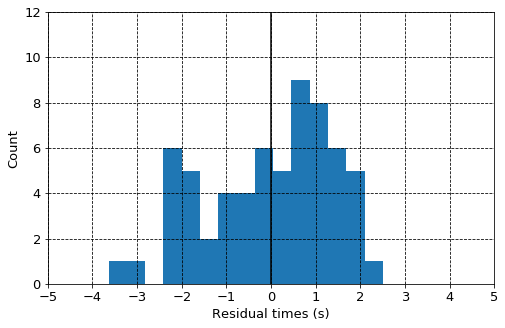

In [196]:
x0 = -8690.885803074732 ; y0 = 6494.387103523577; t0 = 19.446923897082335; z0 = 120

distance_vec = []
for i in range(len(lon2kmlist)):
    xdiff_sq = (lon[i]-float(x0))**2
    ydiff_sq = (lat[i]-float(y0))**2
    zdiff_sq = (elv[i]-z0)**2 
    D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
    distance_vec.append(D)

restime_cor = []
for i in range(len(distance_vec)):
    restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
    restime_cor.append(restime_val)

plt.figure(figsize=(8,5))
plt.ylim(0,12)
plt.xlim(-5,5)
plt.axvline(x=0, color='black', linestyle='-', zorder = 1)
plt.hist(restime_cor,bins=15, alpha=1)
plt.yticks([0,2,4,6,8,10,12], fontsize = 13) 
plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], fontsize = 13) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 1)
plt.xlabel('Residual times (s)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.show()

In [197]:
print(restime_cor)
print(np.nanmean(restime_cor))

[-0.1357115836555849, 0.04393209877472515, 0.4164131061670062, -0.4282069922832932, 1.856799751217359, 1.8681315063428485, 1.8747598390903448, 1.6614171508835938, 1.85808397888745, -0.1052277640542485, -1.732403659285339, -2.346881707332429, 1.1255098096495573, 1.259339881327115, -1.1099992590892072, -0.8994280677355562, -2.1155340014361173, -1.6719283357975883, 1.582683864953438, -1.6520450524610766, -1.2606862419930849, -0.8796789320291225, 0.8688407170368038, 1.1856012016688169, -2.1562437590694543, -0.1045981442782562, 2.505977053804415, 1.4060053843629774, 1.2036140491901648, 1.0731047350060692, 1.3440386256085048, 0.8149045049915529, 0.47678441678532835, 0.4389881203853889, 0.09738899772310106, -2.1460221870119227, -1.5509077772041877, -1.9453209819335768, 0.30662841158294896, -0.8482456348742744, -2.0007078728662293, -0.36572418455349975, -0.47586428648020274, -2.2256467478412247, -2.8566089781061805, -3.637532027707792, 1.0506556232049107, 0.13705308905291957, 0.678210372280723

**Question 19**: Assess your final result, using the following discussion starters:
1. Find the earthquake on earthquake.usgs.gov and report on the actual, USGS-inferred hypocenter, origin time, and magnitude. For your information, the link to the corresponding USGS earthquake page is 
https://earthquake.usgs.gov/earthquakes/eventpage/ak01910ggmj6/executive
2. Is your best earthquake epicenter north, east, south, or west of the one from the USGS? 
3. How confident are you of your answer? 
4. Draw an error ellipse around the epicenter,
5. What does orientation of the long axis of the ellipse tell us and why is this so?
6. Which of the hypocenter coordinates is the most uncertain?
7. What trade-off exists, if any, between the values for origin time and longitude or those for origin time and latitude, and why might one be stronger than the other?
8. What regional tectonic explanation does the USGS provide and what does that imply for the chances that a similar earthquake will occur again in the same or nearby place?  

----------> Answer:

1. The earthquake (M5.2) occured at 58.316 °N, 155.302 °W, which is, in (x,y) km, (-8696.912, 6484.15604) km. The USGS-inferred origin time is 2019-01-22 04:43:19.680 (UTC). Our best guess is in (x km, y km, t s) is (-8690.886, 6494.3871, 19.45). 


2. My best earthquake epicenter is to the north-east of the one from USGS. 


3. The USGS earthquake location is within 2 standard deviations from my best guess epicenter. We can see this from the my error ellipses (two drawn for 1 and 2 standard deviations respectively). This means the USGS earthquake location is probable. If the USGS earthquake location were within 1 STD, then I would consider my answer very good and would be confident with the answer. Since it is within 2 STD, I am fairly confident in my answer.


4. The error ellipses around epicenter are drawn in the figure above. The USGS earthquake location is indicated with a red star. My best guess epicenter location is indicated with a black star.


5. The orientation of the long axis of the ellipse tells us the direction that we can move in longitude and latitude to be still in the confidence interval. In this case, it seems that we can move more in longitude than in latitude (where the ellipse is narrower). 


6. The hypocenter that is most uncertain is latitude. This can be concluded from the covlatlon matrix, where the STD of  latitude (115.7954174) is larger than the STD of longitude (109.12806454). 


7. To answer this question, we once again look at the covariance matrix, specifically the covariance between time and longitude (0.29925442) and time and latitude (3.02821357). This is because these values tell us if we change one of those model parameters by an amount, we now know how much the other variable will change. For example, if the time is changed, the longitude changes by a smaller amount than the latitude value. Higher covariance means a higher trade-off, and the covariance between time and latitude is stronger than the covariance between the time and longitude. We can kind of deduce this conclusion looking at the error ellipses. This is the case due to the station configuration (where many stations are located along a line-ish), so we can move more in longitude without changing the origin time very much compared to moving along the latitude (which would result in a change in the origin time by more).


8. Referring to USGS information about nearby seismicity, this region appears to be a highly seismically active zone, part of the Aleutian arc (which extends from the Gulf of Alaska to the Kamchatka Peninsula). There is a high change that a similar earthquake will occur again in the same or nearby place, although it seems that not many of the earthquakes are such a high magnitude but rather from M2-M3. However, the USGS website also states that this region has historically had many volcanoes and earthquakes. This earthquake was due to subduction of the Pacific plate into the mantle beneath the North America plate.  

**Question 20**: Discuss this confidence region with another student. Are you drawing the same ellipse? Is it a 67% confiden region or a 95% confidence region? Please plot both confidence regions. Does the error ellipse include the USGS epicenter? Provide approximate uncertainty estimates for all your source paramters (epicenter coordinates and origin time), how would you do that? In other words: Estimate the standard deviation in origin time and hypocentral coordinates from the model covariance matrix.

----------> Answer:
Comparing the confidence region with another student, we are drawing the same ellipse. I have drawn both the 67% and 95% confidence regions in different colors. These are plotted again below for convenience. The 95% error ellipses   includes the USGS epicenter. 

From the model covariance matrix, we can estimate the standard deviation in origin time and hypocentral coordinates (by looking at the diagonal). These are: 0.52604765 seconds (time STD), 109.12806454 km (longitude STD), and 115.7954174 km (latitude STD). It would then be appropriate to say that our best guess is in (x, y, t) is 

$$ (-8690.886±109.128 km, 6494.3871±115.7954 km, 19.45± 0.53) $$

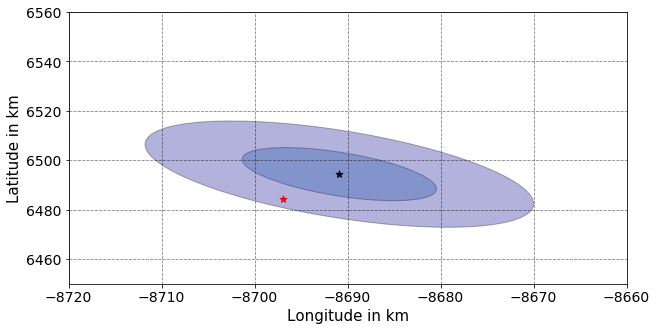

In [198]:
from matplotlib.patches import Ellipse
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt

e_patch = mpl.patches.Ellipse(xy=[ -8690.885803074732, 6494.387103523577], width=14.094348001092895, height=26.4772219500904, angle = -136.52151626435437,edgecolor='black', lw=1, facecolor='tab:blue',alpha=0.3)
f_patch = mpl.patches.Ellipse(xy=[ -8690.885803074732, 6494.387103523577], width=28.18869600218579, height=52.9544439001808, angle = -136.52106017138675,edgecolor='black', lw=1, facecolor='darkblue',alpha=0.3)

fig, ax = plt.subplots(figsize=(10, 5))
plt.grid(linestyle="--", color='black',zorder=0,alpha=0.5)
ax.add_patch(e_patch)
ax.add_patch(f_patch)

ax.set_xlim(-8720, -8660)
ax.set_ylim(6450, 6560)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Longitude in km',fontsize=15)
ax.set_ylabel('Latitude in km',fontsize=15)
ax.scatter(-8696.912, 6484.15604,s = 50,color='red',zorder=20,marker='*') # USGS location
ax.scatter(-8690.885376996064, 6494.3866508873725,s = 50,color='black',zorder=10,marker='*') # guess location
plt.show()

**Question 21**: Reconsider this problem without data from stations south of latitude 58&deg;N. 
1. How does your best estimate of the epicenter change? How do the confidence region and uncertainty estimates change? 
2. How does the distribution of the residuals change?
3. What reasons might underly the changes?

----------> Answer:

1. The best estimate of the epicenter changes to (x, y, t) to (-8691.778±136.336 km, 6501.248±357.892 km, 19.93±2.21 s). This new best estimate of the epicenter is located north-west of the previous guess. The confidence region is much larger and the angle of the tilt is different too (angle=-168.24700217751095°). Before the angle of the tilt was angle = -136.52106017138675°). The uncertainty estimates are also much larger. This can be seen by comparing the previous best guess (-8690.886±109.128 km, 6494.3871±115.7954 km, 19.45± 0.53) with the one now from answering Question 21 (-8691.778±136.336 km, 6501.248±357.892 km, 19.93±2.21 s). The error ellipses are also changed and are much larger as are the uncertainty estimates. Like before, the USGS earthquake location is within 2 STD of the best guess result(plots are provided below).


2. The distributions of the residuals change. Please refer to the figure of the two distributions plotted together. The histogram of the residual times in the case where all stations are considered, there is a more positive skew in residual times. The histogram of the residual times in the case where some stations are omitted, the residual times are more spread out evenly positive and negative (from a visual inspection). From the means of the residual times of both cases, the mean of the case where all stations are considered is 6.641161956535836e-06s (very close to 0s). The mean of the case where some stations are omitted, it is -0.24s.


3. The reasons underlying these changes may be due to the Earth's underlying subsurface feature. It appears that the Pacific plate ends at around 58 °N in this region, so by omitting data from this plate, we are only accounting for information in the above plate. This can be problematic since the USGS earthquake location is at 58.316 °N (quite close to 58 °N). Perhaps the composition and physics in the Pacific plate is different from the North American plate.

In [201]:
print(np.nanmean(restime_cor2))
print(np.nanmean(restime_cor))

-0.23534967451642708
6.641161956535836e-06


In [202]:
dlines = open('loctim.txt','r').readlines()
n = len(dlines)
obsis = np.arange(n)
lat = [] ; lon = []; elv = []; Ptm = []; sta = []
for i in obsis:
    line = dlines[i].split()
    if float(line[0]) > 58:
        lat.append(float(line[0])*lat2km) # latitude
        lon.append(float(line[1])*lon2km) # longitude
        elv.append(-float(line[2])) # elevation
        Ptm.append(float(line[3])) # arrival time
        sta.append(line[4]) # station names

arrivaltimes_after = []
for i in range(len(Ptm)):
    arrivaltimes_after.append(Ptm[i]-np.mean(Ptm))

lon2kmlist = []; lat2kmlist = []
for i in range(len(lon)):
    lon2kmlist.append(lon[i]/lon2km) 
    lat2kmlist.append(lat[i]/lat2km) 

x0 = -8848 ; y0 = 6560.21; t0 = 20; z0 = 120
distance_vec = []
for i in range(len(lon2kmlist)):
    xdiff_sq = (lon[i]-float(x0))**2
    ydiff_sq = (lat[i]-float(y0))**2
    zdiff_sq = (elv[i]-z0)**2 
    D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
    distance_vec.append(D)

restime_cor = []
for i in range(len(distance_vec)):
    restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
    restime_cor.append(restime_val)

left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
for i in range(len(lon2kmlist)):
    listofones.append(1.0)
    left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
    left_col_list.append(left_col)
    right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
    right_col_list.append(right_col)
    
G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
GT = np.transpose(G_matrix) 
GTG = np.matmul(GT, G_matrix)
invGT = inv(GTG)
Ginvtimes_gen = np.matmul(invGT, GT)
m_j = np.matmul(Ginvtimes_gen, restime_cor)

t_new = t0 + m_j[0]; print(t_new)
x_new = x0 + m_j[1]; print(x_new)
y_new = y0 + m_j[2]; print(y_new)

25.513217641826824
-8687.66315416079
6534.866968009172


In [203]:
xit = [-8687.66315416079]; yit = [6534.866968009172]; otit = [25.513217641826824]
t_ch = []; x_ch = []; y_ch = []
x_it = []; y_it = []; ot_it = []
for j in range(20):
    x0 = x_new; y0 = y_new; t0 = t_new
    distance_vec = []
    for i in range(len(lon2kmlist)):
        xdiff_sq = (lon[i]-float(x0))**2
        ydiff_sq = (lat[i]-float(y0))**2
        zdiff_sq = (elv[i]-z0)**2 
        D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
        distance_vec.append(D)
    restime_cor = []
    for i in range(len(distance_vec)):
        restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
        restime_cor.append(restime_val)
    left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
    for i in range(len(lon2kmlist)):
        listofones.append(1.0)
        left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
        left_col_list.append(left_col)
        right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
        right_col_list.append(right_col)
    G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
    GT = np.transpose(G_matrix) 
    GTG = np.matmul(GT, G_matrix)
    invGT = inv(GTG)
    Ginvtimes_gen = np.matmul(invGT, GT)
    m_j = np.matmul(Ginvtimes_gen, restime_cor)
    #print(m_j)
    #print()
    #print('~~~~~~ Q17 ~~~~~~')
    cov_m = (5**2)*inv(np.matmul(GT,G_matrix)) # assume arrival time data has a standard deviaiton of 5.0s
    #print(cov_m)
    #print('~~~~~~ Q17 ~~~~~~')
    #print()
    t_ch.append(m_j[0]); x_ch.append(m_j[1]); y_ch.append(m_j[2])
    t_new = t0 + m_j[0]; otit.append(t_new); print(t_new)
    x_new = x0 + m_j[1]; xit.append(x_new); print(x_new)
    y_new = y0 + m_j[2]; yit.append(y_new); print(y_new)
    
    if (m_j[0] >= -0.01 and m_j[0] <= 0.01) and (m_j[1] >= -0.001 and m_j[1] <= 0.001) and (m_j[2] >= -0.001 and m_j[2] <= 0.001):  
        break
    print('*****')

covlatlon = np.column_stack((cov_m[1][1:3], cov_m[2][1:3])) 
print(covlatlon)

20.415932074667655
-8691.992475430103
6506.511448214228
*****
19.96197407934446
-8691.90453621289
6501.793335486297
*****
19.929260616352213
-8691.79608696738
6501.302838426781
*****
19.926576268840186
-8691.77977550758
6501.2538390851605
*****
19.92631053588866
-8691.777905434574
6501.248758675524
*****
19.926282865394455
-8691.777703777965
6501.248224329969
[[136.33633373 -48.18075948]
 [-48.18075948 357.88925148]]


In [204]:
print(cov_m)

[[  2.20502574   3.00484913  22.57292029]
 [  3.00484913 136.33633373 -48.18075948]
 [ 22.57292029 -48.18075948 357.88925148]]


In [205]:
longitude = -8691.77767981704; latitude = 6501.248161237149; time = 19.92627960579846

from matplotlib.patches import Ellipse

w,v = np.linalg.eig(covlatlon)
major = 2*sqrt(w[0])
minor = 2*sqrt(w[1])
rota = degrees(np.arctan2(v[1,0],v[0,0]))
e = Ellipse((longitude,latitude),major,minor,rota)
e.set_alpha(0.1)
print(e)

covlatlon2 = covlatlon
w,v = np.linalg.eig(covlatlon2)
major = 4*sqrt(w[0])
minor = 4*sqrt(w[1])
rota = degrees(np.arctan2(v[1,0],v[0,0]))
f = Ellipse((longitude,latitude),major,minor,rota)
f.set_alpha(0.1)
print(f)

Ellipse(xy=(-8691.77767981704, 6501.248161237149), width=22.477730432391663, height=38.36214247724214, angle=-168.24700217751095)
Ellipse(xy=(-8691.77767981704, 6501.248161237149), width=44.955460864783326, height=76.72428495448428, angle=-168.24700217751095)


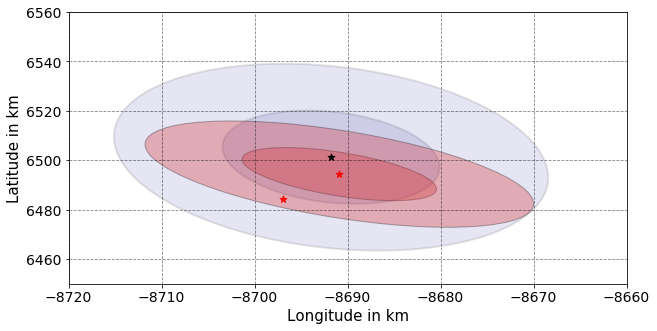

In [206]:
from matplotlib.patches import Ellipse
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt

h_patch = mpl.patches.Ellipse(xy=[ -8691.77767981704, 6501.248161237149], width=22.477740190823468, height=38.36228714534193, angle = -168.24706792722873,edgecolor='black', lw=2, facecolor='darkblue',alpha=0.1)
i_patch = mpl.patches.Ellipse(xy=[ -8691.77767981704, 6501.248161237149], width=44.955460864783326, height=76.72428495448428, angle = -168.24706792722873,edgecolor='black', lw=2, facecolor='darkblue',alpha=0.1)

e_patch = mpl.patches.Ellipse(xy=[ -8690.885803074732, 6494.387103523577], width=14.094348001092895, height=26.4772219500904, angle = -136.52151626435437,edgecolor='black', lw=1, facecolor='tab:red',alpha=0.3)
f_patch = mpl.patches.Ellipse(xy=[ -8690.885803074732, 6494.387103523577], width=28.18869600218579, height=52.9544439001808, angle = -136.52106017138675,edgecolor='black', lw=1, facecolor='tab:red',alpha=0.3)

fig, ax = plt.subplots(figsize=(10, 5))
plt.grid(linestyle="--", color='black',zorder=0,alpha=0.5)
ax.add_patch(h_patch)
ax.add_patch(i_patch)

ax.add_patch(e_patch)
ax.add_patch(f_patch)

ax.set_xlim(-8720, -8660)
ax.set_ylim(6450, 6560)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Longitude in km',fontsize=15)
ax.set_ylabel('Latitude in km',fontsize=15)
ax.scatter(-8696.912, 6484.15604,s = 50,color='red',zorder=20,marker='*') # USGS location
ax.scatter(-8691.77767981704, 6501.248161237149,s = 50,color='black',zorder=10,marker='*') # new guess location
ax.scatter(-8690.885803074732, 6494.387103523577,s = 50,color='red',zorder=10,marker='*') # guess location from before
plt.show()

#NOTE THAT THE RED ELLIPSES ARE THE ONES WITH ALL STATIONS CASE.

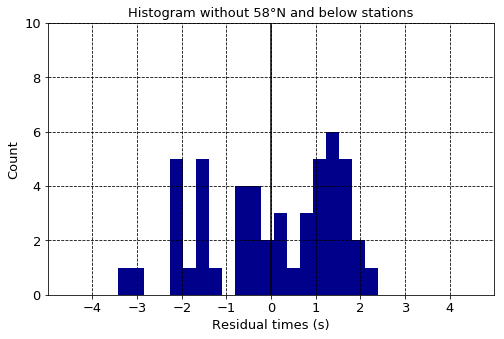

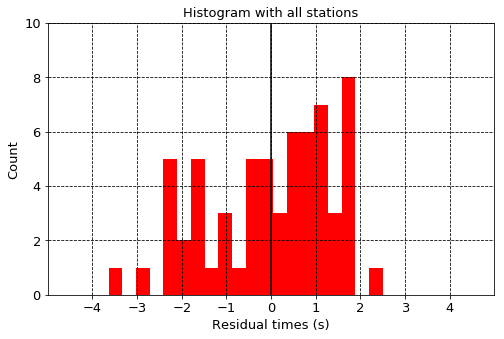

In [207]:
x0 = -8691.777682353017 ; y0 = 6501.2481679056045; t0 = 19.92627995014628; z0 = 120

distance_vec = []
for i in range(len(lon2kmlist)):
    xdiff_sq = (lon[i]-float(x0))**2
    ydiff_sq = (lat[i]-float(y0))**2
    zdiff_sq = (elv[i]-z0)**2 
    D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
    distance_vec.append(D)

restime_cor2 = []
for i in range(len(distance_vec)):
    restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
    restime_cor2.append(restime_val)
    
restime_cor = [-0.1357115836555849, 0.04393209877472515, 0.4164131061670062, -0.4282069922832932, 1.856799751217359, 1.8681315063428485, 1.8747598390903448, 1.6614171508835938, 1.85808397888745, -0.1052277640542485, -1.732403659285339, -2.346881707332429, 1.1255098096495573, 1.259339881327115, -1.1099992590892072, -0.8994280677355562, -2.1155340014361173, -1.6719283357975883, 1.582683864953438, -1.6520450524610766, -1.2606862419930849, -0.8796789320291225, 0.8688407170368038, 1.1856012016688169, -2.1562437590694543, -0.1045981442782562, 2.505977053804415, 1.4060053843629774, 1.2036140491901648, 1.0731047350060692, 1.3440386256085048, 0.8149045049915529, 0.47678441678532835, 0.4389881203853889, 0.09738899772310106, -2.1460221870119227, -1.5509077772041877, -1.9453209819335768, 0.30662841158294896, -0.8482456348742744, -2.0007078728662293, -0.36572418455349975, -0.47586428648020274, -2.2256467478412247, -2.8566089781061805, -3.637532027707792, 1.0506556232049107, 0.13705308905291957, 0.6782103722807236, 0.785611203731996, 1.6016187157479962, 1.1493559236131716, -0.239180504161709, 0.6493950591304909, 0.7686798825535348, 0.5697085211213491, 1.717658777044015, 0.5505903989071044, -0.2662170583741883, -0.5633397673691434, -1.7180016505174933, 1.6629782272389662, 0.8478485536385563]
plt.figure(figsize=(8,5))
plt.ylim(0,10)
plt.xlim(-5,5)
plt.axvline(x=0, color='black', linestyle='-', zorder = 1)
plt.hist(restime_cor2,bins=20, alpha=1,color='darkblue')
plt.yticks([0,2,4,6,8,10], fontsize = 13) 
plt.xticks([-4,-3,-2,-1,0,1,2,3,4], fontsize = 13) 
plt.title('Histogram without 58°N and below stations', fontsize = 13) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 1)
plt.xlabel('Residual times (s)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.show()

plt.figure(figsize=(8,5))
plt.ylim(0,10)
plt.xlim(-5,5)
plt.axvline(x=0, color='black', linestyle='-', zorder = 1)
plt.hist(restime_cor,bins=20, alpha=1,color='red')
plt.yticks([0,2,4,6,8,10], fontsize = 13) 
plt.xticks([-4,-3,-2,-1,0,1,2,3,4], fontsize = 13) 
plt.title('Histogram with all stations', fontsize = 13) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 1)
plt.xlabel('Residual times (s)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.show()

In [208]:
print(np.nanmean(restime_cor2))
print(np.nanmean(restime_cor))

-7.38111793907592e-13
6.641161956535836e-06


**Question 22**: The vast majority of earthquakes occurs at shallower depths than 40 km. Describe broadly what happens to the accuracy and the precision of the solution if you assume that this particular earthquake's hypocenter was no more than 40 km deep?

----------> Answer:

If we assumed this particular earthquake had a hypocenter that was no more than 40 km deep, this changes the distance. The precision of the solution in longitude and latitude is equal (if not better) than the first case where we assumed that the hypocenter was 120 km in depth. The STD is smaller in time, longitude, and latitude. The assumption that P-waves travel along straight wave paths is perhaps less of a limitation in this case. Moreover, we didn't make an estimate for depth, which would have resulted in a large STD (conjecture). If we had done this (although depth is the most difficult variable), we would probably find that the accuracy and precision in the solution in terms of depth is weaker. But since we didn't, the precision of the solution is equal if not better than the first case. 

However, the origin time is now not very accurate (we have the same configuration of the experiment as before). The accuracy of the solution is  weaker. Our final best guess assuming that this particular earthquake's hypocenter was no more than 40 km deep actually results in a best guess guess that is likely further away from the USGS earthquake location and origin time (as the arrival times do depend on depth and now our depth is quite far from the actual depth and we have not made modifications to depth like we did forlongitude and latitude). 

In [209]:
dlines = open('loctim.txt','r').readlines()
n = len(dlines)
obsis = np.arange(n)
lat = [] ; lon = []; elv = []; Ptm = []; sta = []

for i in obsis:
    line = dlines[i].split()
    lat.append(float(line[0])*lat2km) # latitude
    lon.append(float(line[1])*lon2km) # longitude
    elv.append(-float(line[2])) # elevation
    Ptm.append(float(line[3])) # arrival time
    sta.append(line[4]) # station names

arrivaltimes_after = []
for i in range(len(Ptm)):
    arrivaltimes_after.append(Ptm[i]-np.mean(Ptm))

lon2kmlist = []; lat2kmlist = []
for i in range(len(lon)):
    lon2kmlist.append(lon[i]/lon2km) 
    lat2kmlist.append(lat[i]/lat2km) 

x0 = -8848 ; y0 = 6560.21; t0 = 20; z0 = 35
distance_vec = []
for i in range(len(lon2kmlist)):
    xdiff_sq = (lon[i]-float(x0))**2
    ydiff_sq = (lat[i]-float(y0))**2
    zdiff_sq = (elv[i]-z0)**2 
    D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
    distance_vec.append(D)

restime_cor = []
for i in range(len(distance_vec)):
    restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
    restime_cor.append(restime_val)

left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
for i in range(len(lon2kmlist)):
    listofones.append(1.0)
    left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
    left_col_list.append(left_col)
    right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
    right_col_list.append(right_col)
    
G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
GT = np.transpose(G_matrix) 
GTG = np.matmul(GT, G_matrix)
invGT = inv(GTG)
Ginvtimes_gen = np.matmul(invGT, GT)
m_j = np.matmul(Ginvtimes_gen, restime_cor)

t_new = t0 + m_j[0]; print(t_new)
x_new = x0 + m_j[1]; print(x_new)
y_new = y0 + m_j[2]; print(y_new)

xit = [-8714.525191432225]; yit = [6526.162735165056]; otit = [26.000958026616715]
t_ch = []; x_ch = []; y_ch = []
x_it = []; y_it = []; ot_it = []
for j in range(20):
    x0 = x_new; y0 = y_new; t0 = t_new
    distance_vec = []
    for i in range(len(lon2kmlist)):
        xdiff_sq = (lon[i]-float(x0))**2
        ydiff_sq = (lat[i]-float(y0))**2
        zdiff_sq = (elv[i]-z0)**2 
        D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
        distance_vec.append(D)
    restime_cor = []
    for i in range(len(distance_vec)):
        restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
        restime_cor.append(restime_val)
    left_col_list = []; right_col_list = []; rightright_col_list = []; listofones = []
    for i in range(len(lon2kmlist)):
        listofones.append(1.0)
        left_col = (x0 - lon[i]) / (distance_vec[i]*alpha)
        left_col_list.append(left_col)
        right_col = (y0 - lat[i]) / (distance_vec[i]*alpha)
        right_col_list.append(right_col)
    G_matrix = np.column_stack((listofones, left_col_list, right_col_list)) 
    GT = np.transpose(G_matrix) 
    GTG = np.matmul(GT, G_matrix)
    invGT = inv(GTG)
    Ginvtimes_gen = np.matmul(invGT, GT)
    m_j = np.matmul(Ginvtimes_gen, restime_cor)
    #print(m_j)
    #print()
    #print('~~~~~~ Q17 ~~~~~~')
    cov_m = (5**2)*inv(np.matmul(GT,G_matrix)) # assume arrival time data has a standard deviaiton of 5.0s
    #print(cov_m)
    #print('~~~~~~ Q17 ~~~~~~')
    #print()
    t_ch.append(m_j[0]); x_ch.append(m_j[1]); y_ch.append(m_j[2])
    t_new = t0 + m_j[0]; otit.append(t_new); #print(t_new)
    x_new = x0 + m_j[1]; xit.append(x_new); #print(x_new)
    y_new = y0 + m_j[2]; yit.append(y_new); #print(y_new)
    
    if (m_j[0] >= -0.01 and m_j[0] <= 0.01) and (m_j[1] >= -0.001 and m_j[1] <= 0.001) and (m_j[2] >= -0.001 and m_j[2] <= 0.001):  
        break
print(cov_m)
covlatlon = np.column_stack((cov_m[1][1:3], cov_m[2][1:3])) 
print(covlatlon)

26.000958026616715
-8714.525191432225
6526.162735165056
[[  0.48794942   0.52866059   2.00144849]
 [  0.52866059  83.40918916 -44.40323602]
 [  2.00144849 -44.40323602  83.01344094]]
[[ 83.40918916 -44.40323602]
 [-44.40323602  83.01344094]]


In [210]:
longitude = -8689.253001640338; latitude = 6503.363674916831; time = 23.523586785442877

w,v = np.linalg.eig(covlatlon)
major = 2*sqrt(w[0]); minor = 2*sqrt(w[1])
rota = degrees(np.arctan2(v[1,0],v[0,0]))
e = Ellipse((longitude,latitude),major,minor,rota)
e.set_alpha(0.1)
print(e)

covlatlon2 = covlatlon
w,v = np.linalg.eig(covlatlon2)
major = 4*sqrt(w[0]); minor = 4*sqrt(w[1])
rota = degrees(np.arctan2(v[1,0],v[0,0]))
f = Ellipse((longitude,latitude),major,minor,rota)
f.set_alpha(0.1)
print(f)

Ellipse(xy=(-8689.253001640338, 6503.363674916831), width=22.59336114568974, height=12.459155370914912, angle=-44.87233727288317)
Ellipse(xy=(-8689.253001640338, 6503.363674916831), width=45.18672229137948, height=24.918310741829824, angle=-44.87233727288317)


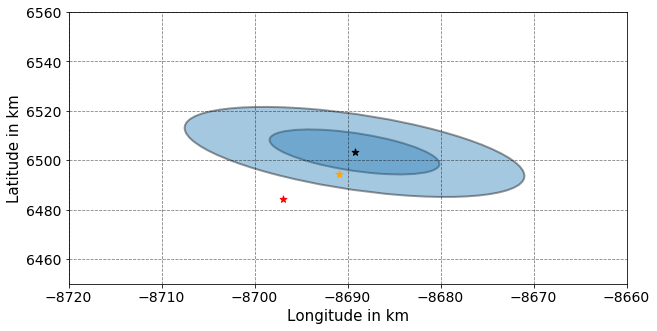

In [211]:
h_patch = mpl.patches.Ellipse(xy=[ -8689.253001640338, 6503.363674916831], width=22.59336114568974, height=12.459155370914912, angle = -44.87233727288317,edgecolor='black', lw=2, facecolor='tab:blue',alpha=0.4)
i_patch = mpl.patches.Ellipse(xy=[-8689.253001640338, 6503.363674916831], width=45.18672229137948, height=24.918310741829824, angle = -44.87233727288317,edgecolor='black', lw=2, facecolor='tab:blue',alpha=0.4)

fig, ax = plt.subplots(figsize=(10, 5))
plt.grid(linestyle="--", color='black',zorder=0,alpha=0.5)
ax.add_patch(h_patch)
ax.add_patch(i_patch)

ax.set_xlim(-8720, -8660)
ax.set_ylim(6450, 6560)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Longitude in km',fontsize=15)
ax.set_ylabel('Latitude in km',fontsize=15)
ax.scatter(-8696.912, 6484.15604,s = 50,color='red',zorder=20,marker='*') # USGS location
ax.scatter(-8689.253001640338, 6503.363674916831,s = 50,color='black',zorder=10,marker='*') # guess location
ax.scatter(-8690.885803074732, 6494.387103523577,s = 50,color='orange',zorder=10,marker='*') # guess location from the first question

plt.show()

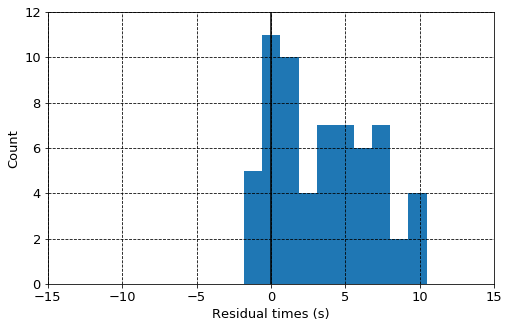

In [212]:
x0 = -8689.253001640338 ; y0 = 6503.363674916831; t0 = 20; z0 = 35
distance_vec = []
for i in range(len(lon2kmlist)):
    xdiff_sq = (lon[i]-float(x0))**2
    ydiff_sq = (lat[i]-float(y0))**2
    zdiff_sq = (elv[i]-z0)**2 
    D = sqrt(xdiff_sq + ydiff_sq + zdiff_sq) 
    distance_vec.append(D)
restime_cor2 = []
for i in range(len(distance_vec)):
    restime_val = Ptm[i] - ((t0) + (distance_vec[i] / alpha))
    restime_cor2.append(restime_val)

plt.figure(figsize=(8,5))
plt.ylim(0,12); plt.xlim(-15,15)
plt.axvline(x=0, color='black', linestyle='-', zorder = 1)
plt.hist(restime_cor2,bins=10, alpha=1,color='tab:blue')
plt.yticks([0,2,4,6,8,10,12], fontsize = 13) 
plt.xticks([-15,-10,-5,0,5,10,15], fontsize = 13) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 1)
plt.xlabel('Residual times (s)', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.show()

**Question 23**: Submit this Jupyter notebook, including answers to the above questions and reflections on discussions you had with peers. 

----------> Answer:

This is the Jupyter notebook.